# Euler-Lagrange: fuerzas externas | Ejemplos

[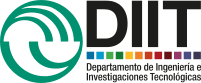](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Ejemplo: péndulo con fuerza elástica
La cuerda de un péndulo tiene cierta elastícidad, lo cual puede contemplarse al realizar un modelo para obtener su dinámica.

En la figura de abajo la pesa de masa $m$ cuyo centro se denomina $C$ no solo está a merced de la fuerza peso $\vec{P} = m \vec{g}$ y la elástica del resorte sino que además actúa una 
$$
\vec{F}= F(t) \hat{I}.
$$

![](figuras/penduloElastico.png "Péndulo con cuerda elástica")

### Cálculo del trabajo virtual
- Desplazamiento virtual en función de coordenadas generalizadas

$$
\delta \vec{r}_c
= \delta x \hat{\rho} + (l_0 + x) \delta \theta \hat{\theta}
= \delta x \left( \sin(\theta) \hat{I} - \cos(\theta) \hat{J} \right) + (l_0 + x) \delta \theta \left( \cos(\theta) \hat{I} + \sin(\theta) \hat{J} \right).
$$
- Trabajo virtual a causa de la $\vec{F}$ aplicada en $C$

$$
\begin{aligned}
\delta W
&= \sum_i Q_i \delta q_i = \vec{F} \cdot \delta \vec{r}_C = F(t) \hat{I} \cdot \delta \vec{r}_c\\
&= F(t) \sin(\theta) \delta x + F(t) (l_0 + x) \cos(\theta) \delta \theta \\
&= Q_x \delta x + Q_\theta \delta \theta \\
&\implies Q_x = F(t) \sin(\theta) \quad Q_\theta = F(t) (l_0 + x) \cos(\theta)
\end{aligned}
$$

### Cálculo directo de fuerzas generalizadas
- Se escribe $\vec{r}$ en el sistema geométrico de coordenadas 

$$
\vec{r}_C = (l_0 + x) \hat{\rho} = (l_0 + x) \left( \sin(\theta) \hat{I} - \cos(\theta) \hat{J} \right)
$$

- Se calcula para cada $\delta q_i$

$$
Q_i \delta q_i = \sum_j \vec{F} \cdot \left( \frac{\partial \vec{r}_j}{\partial q_i} \right) \delta q_i
$$

$\exists! \vec{F} \implies
\left\{
  \begin{array}{l}
    Q_x \delta x = \vec{F} \cdot \frac{\partial \vec{r}_C}{\partial x} \delta x\\
    Q_\theta \delta \theta = \vec{F} \cdot \frac{\partial \vec{r}_C}{\partial \theta} \delta \theta
  \end{array}\right.
$
por tanto a las coordenadas generalizadas $x$ y $\theta$ corresponden sendas fuerzas generalizadas

$$
\begin{aligned}
Q_x 
= \vec{F} \cdot \frac{\partial \vec{r}_C}{\partial x} 
&= F(t) \hat{I} \cdot \left( \sin(\theta) \hat{I} - \cos(\theta) \hat{J} \right)
= F(t) \sin(\theta)\\
Q_\theta 
= \vec{F} \cdot \frac{\partial \vec{r}_C}{\partial \theta} 
&= F(t) \hat{I} \cdot \left[ (l_0 + x) \left( \cos(\theta) \hat{I} + \sin(\theta) \hat{J} \right) \right]
= F(t) (l_0 + x) \cos(\theta)
\end{aligned}
$$

## Otro ejemplo: barra que pende de un carro
- Barra $m_2$, $l$ (centro de masa en G) pende de (A) sujeta a $\vec{g}$.
- Carro $m_1$ unido a pared por un resorte de constante elástica $k$.

![](figuras/erste.png "Barra rígida como péndulo pendiente de un carro oscilante")

In [21]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [22]:
# Defino los parámetros físicos del sistema
m1, m2, k, g, l = sym.symbols('m_1, m_2, k, g, l', positive=True)

In [23]:
# posiciones de los centros de masa
e = mech.ReferenceFrame('e')
x, zeta = mech.dynamicsymbols('x, theta')
m1_r = x* e.x
m2_r = m1_r + (l/2)* (sym.sin(zeta)* e.x + sym.cos(zeta)* (-e.y) )

#### Energía cinética

La masa de la barra está distribuida, no corresponde calcular su energía cinética como la de una partícula, sino como la de un sólido rígido.
Para calcular su correspondiente energía cinética de rotación
$$
T_\mathrm{rotación} = \frac{1}{2} I \omega^2,
$$
necesitamos el [momento de inercia](https://es.wikipedia.org/wiki/Anexo:Momentos_de_inercia) $I$.
Para una barra de longitud $l$ y masa $m$ girando en torno a un eje transversal al longitudinal que pasa por su centro de masa es
$$
I_\mathrm{barra\,cm} = \frac{m l^2}{12}.
$$
En este problema tal eje está desplazado a un extremo de la barra, a $\frac{l}{2}$ del centro de masa, por lo que debe adicionarse el término que indica el [teorema de Steiner](https://es.wikipedia.org/wiki/Teorema_del_eje_paralelo)
$$
I_\mathrm{barra\,extremo} = m \left(\frac{l}{2}\right)^2 + \frac{m l^2}{12} = m \frac{l^2}{3}.
$$


In [24]:
barra_I_centro = m2* l**2/ 12  # momento de inercia barra en torno a centro https://es.wikipedia.org/wiki/Anexo:Momentos_de_inercia
barra_I_extremo = barra_I_centro + m2* (l/2)**2 # a (l/2) del centro de masa, con teorema de Steiner

barra_I =  sym.Eq(
  sym.Symbol('I_{barra}'),
  barra_I_extremo
)
barra_I

In [42]:
unMedio = sym.Rational(1, 2)
t = sym.symbols('t') # tiempo
barra_T_rotación = sym.Eq(
  sym.Symbol('T_{rotación}'),
  unMedio* barra_I.rhs* zeta.diff(t)**2
)
barra_T_rotación

Por el contrario para el carro no hay inconveniente en considerar la masa concentrada en el centro de masa, ya que no está sometido a rotación. Por lo tanto la energía cinética del carro la tratamos de la forma usual.

In [26]:
def energíaCinéticaTraslación(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    T_traslación = sym.Eq(
        sym.Symbol('T_{traslación}'),
        unMedio* masa* velocidad.dot(velocidad)
        ).simplify()
    return T_traslación

In [43]:
carro_T = energíaCinéticaTraslación(m1, m1_r, e)
barra_T_traslación = energíaCinéticaTraslación(m2, m2_r, e)

Y por tanto la energía cinética en este sistema es:

In [44]:
T = sym.Eq(
  sym.Symbol('T'),
  carro_T.rhs + barra_T_rotación.rhs + barra_T_traslación.rhs )
T

#### Energía potencial

El resorte puede almacenar energía potencial elástica.

In [45]:
resorte_V = sym.Eq(
  sym.Symbol('V_{elástica}'),
  unMedio* k* x**2
)
resorte_V

Y si bien la barra es un cuerpo extenso donde su punto de unión con el carro no varia altura en tanto que el extremo lo hace en una forma pronunciada, realizaremos una aproximación para simplificar el problema. A los efectos de la energía potencial gravitatoria se considerará que la barra concentra toda su masa en su centro de masa.

In [46]:
def energíaPotencialGravitatoria(masa, posición, aceleracionGravitatoria):
    """
    Retorna la energía potencial gravitatoria de una partícula de masa m cuya posición r está dada en un sistema de referencia en el cual g es la aceleración gravitatoria terrestre.
    
    Parámetros
    ----------
    aceleracionGravitatoria: (sympy.physics.vector.vector.Vector)
        vector orientado según el sistema de referencia
    masa: (sympy.core.symbol.Symbol
        del cuerpo en cuestión
    posición: (sympy.core.symbol.Symbol)
        del centro de masa en un sistema de referencia relacionable con el de aceleracionGravitatoria
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        V = - (m \vec{aceleracionGravitatoria}) \cdot{posición}
    """
    V_gravitatoria = sym.Eq(
        sym.Symbol('V_{gravitatoria}'),
        - (masa* aceleracionGravitatoria).dot(posición)
        ).simplify()
    return V_gravitatoria

In [47]:
aceleracionGravitatoria = g* (- e.y)
barra_V = energíaPotencialGravitatoria(m2, m2_r, aceleracionGravitatoria)
barra_V

Así la energía potencial en el sistema es: 

In [48]:
# Energía potencial
V = sym.Eq(
  sym.Symbol('V'),
  resorte_V.rhs + barra_V.rhs
)
V 

### Dos coordenadas generalizadas, dos ecuaciones de Euler-Lagrange

In [49]:
def eulerLagrange(T, V, coordenadaGeneralizada):
    '''    
    Esta función devuelve la ecuación de Euler-Lagrange para una coordenada generalizada a partir de las energías del sistema.
    
    Parámetros
    ----------
    T : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        Para la que quiere obtenerse la ecuación de Euler-Lagrange
        
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        Ecuación de Euler-Lagrange homogénea para la coordenadaGeneralizada
    '''
    lagrangiano = (T.rhs - V.rhs).expand()
    t = sym.Symbol('t') # como se deriva respecto al tiempo con la función diff se declara t como símbolo 
    return sym.Eq(
        lagrangiano.diff(coordenadaGeneralizada) 
        - lagrangiano.diff(coordenadaGeneralizada.diff(t)).diff(t),
        0
    )

Llamaremos de ahora en más a estas ecuaciones de Euler-Lagrange las ecuaciones de **Euler-Lagrange homogéneas** para diferenciarlas de las ecuaciones de Euler-Lagrange que contemplen fuerzas no conservativas.

$$
\frac{\partial \mathcal{L} }{ \partial x } - \frac{ \mathrm{d} }{ \mathrm{d} t } \frac{\partial \mathcal{L} }{ \partial \dot{x} } 
= 0
$$

In [50]:
x_EL_homogénea = eulerLagrange(T, V, x)
x_EL_homogénea

$$
\frac{\partial \mathcal{L} }{ \partial \theta } - \frac{ \mathrm{d} }{ \mathrm{d} t } \frac{\partial \mathcal{L} }{ \partial \dot{\theta} } 
= 0
$$

In [51]:
zeta_EL_homogénea = eulerLagrange(T, V, zeta)
zeta_EL_homogénea

### Ahora agregamos unas fuerzas no conservativas
Al sistema anterior se aplican dos fuerzas no conservativas:
- una motríz externa $\vec{F}_\text{motríz}= F(t) \hat{x}$
- una de amortiguación proporcional a la velocidad $\vec{F}_\text{amortiguación}= - b \dot{x} \hat{x}$

![](figuras/zweite.png "Lo mismo con una fuerza motríz y una de amortiguación.")

Se analizan la variación de trabajos virtuales

$$
\begin{aligned}
\delta W^\text{nc} 
& = \sum_j \vec{F}_j^\text{nc} \cdot \delta \vec{r}_j = \sum_i Q_i \delta q_i \\
& = \left[ - b \dot{x} + F(t) \right] \delta x + \left[ 0 \right] \delta \theta \\
& \implies Q_x = - b \dot{x} + F(t) \quad Q_\theta = 0
\end{aligned}
$$

La otra forma es analizando el desplazamiento de punto donde se aplica $\vec{F}(t)$
$$
\vec{r}_A = x \hat{x}
$$
entonces
$$
\frac{\partial \vec{r}_A}{\partial x} = \hat{x} \qquad
\frac{\partial \vec{r}_A}{\partial \theta} = 0 ,
$$
y por tanto
$$
Q_x 
= \left[ \left(- b \dot{x} + F(t) \right) \hat{x} \right] \cdot \frac{\partial \vec{r}_A}{\partial x} 
= \left[ \left(- b \dot{x} + F(t) \right) \hat{x} \right] \cdot \hat{x} 
= - b \dot{x} + F(t)\\
Q_\theta 
= \left[ \left(- b \dot{x} + F(t) \right) \hat{x} \right] \cdot \frac{\partial \vec{r}_A}{\partial \theta} = 0
$$
esta última es $0$ porque $\vec{r}_A$ no tiene dependencia con $\theta$.

Este último procedimiento parece el más automático.

In [52]:
b = sym.Symbol('b', positive= True)
F = sym.Function('F')(t)
fuerzas_m1_r = (-b* x.diff(t)+ F)* e.x # sumataria de fuerzas sobre m1_r (vector)
x_Q = fuerzas_m1_r.dot(m1_r.diff(x, e))
zeta_Q = fuerzas_m1_r.dot(m1_r.diff(zeta, e))
x_Q, zeta_Q 

Entonces las ecuaciones de Euler-Lagrange

$$
\frac{\partial}{\partial q_i} \mathcal{L}
- \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q}_i} \mathcal{L}
+ \sum_k \lambda_k \frac{\partial}{\partial q_i} f_k
+ \sum_j \vec{F}_j \cdot \left( \frac{\partial \vec{r}_j}{\partial q_i} \right)
= 0,
$$

que en este caso no tienen fuerzas de vínculo por lo que quedan

$$
\frac{\partial}{\partial q_i} \mathcal{L}
- \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q}_i} \mathcal{L}
+ \sum_j \vec{F}_j \cdot \left( \frac{\partial \vec{r}_j}{\partial q_i} \right)
= 0,
$$

Para la coordenada generalizada $x$ queda
$$
\frac{\partial \mathcal{L} }{ \partial x } 
- \frac{ \mathrm{d} }{ \mathrm{d} t } \frac{\partial \mathcal{L} }{ \partial \dot{x} }
+ Q_x
= 0
$$



Para aprovechar el código que tenemos para obtener Euler-Lagrange homogénea ordenamos la ecuación anterior para mantener el orden de signos que venimos utilizando
$$
\begin{aligned}
\frac{\partial \mathcal{L} }{ \partial x } 
- \frac{ \mathrm{d} }{ \mathrm{d} t } \frac{\partial \mathcal{L} }{ \partial \dot{x} }
&= - Q_x \\
\frac{\partial \mathcal{L} }{ \partial x } 
- \frac{ \mathrm{d} }{ \mathrm{d} t } \frac{\partial \mathcal{L} }{ \partial \dot{x} }
&= - (-b \dot{x} + F(t) )
\end{aligned}
$$



In [53]:
x_EL = sym.Eq(
  x_EL_homogénea.lhs,
  - x_Q
)
x_EL

En tanto que en la ecuación de Euler-Lagrange para la coordenada $\theta$ no hay modificaciones 

In [55]:
zeta_EL = sym.Eq(
  zeta_EL_homogénea.lhs,
  - zeta_Q
)
zeta_EL

De todas formas es claro que para obtener la dinámica hay que resolver este sistema acoplado de estas dos ecuaciones diferenciales.

En particular hay que tener en cuenta que $F = F(t)$ por lo que habrá que desarrollar ésta en una expresión compatible con las herramientas de resolución que se utilicen. Hacia el final del curso veremos la aplicación del desarrollo de Fourier para este tipo de problemas.